In [8]:
import sys
import numpy
import mozaik
from mozaik.controller import run_workflow, setup_logging
from mozaik.storage.datastore import Hdf5DataStore,PickledDataStore
from parameters import ParameterSet
from mozaik.visualization.plotting import *
from mozaik.analysis.technical import NeuronAnnotationsToPerNeuronValues
from mozaik.tools.mozaik_parametrized import colapse, colapse_to_dictionary, MozaikParametrized
from mozaik.analysis.analysis import *
from mozaik.analysis.vision import *
from mozaik.storage.queries import *

setup_logging()
data_store = PickledDataStore(load=True,parameters=ParameterSet({'root_directory':'/home/antolikjan/remote/cluster/projects/mozaik/contrib/MorganTaylorModel/20170905-160507[param_random_and_fast_afferent_delay.defaults]CombinationParamSearch{11}/MorganTaylorModel_ParameterSearch_____off_bias:1.0_tau_rec:30_base_weight:0.002_inhibitory_connection_ratio:0.75_tau_syn_I:1.9_v_thresh:-56_density:3000_gain:30_contrast_scaler:200000_luminance_gain:0.0_stdev:2.3', 'store_stimuli': False}),replace=True)


_connections = data_store.get_analysis_result(identifier='Connections')
for ads in _connections:
        print ads.proj_name


NeuronAnnotationsToPerNeuronValues(data_store,ParameterSet({})).analyse()

analog_ids = param_filter_query(data_store,sheet_name="V1_Exc_L4").get_segments()[0].get_stored_esyn_ids()
analog_ids_inh = param_filter_query(data_store,sheet_name="V1_Inh_L4").get_segments()[0].get_stored_esyn_ids()
spike_ids = param_filter_query(data_store,sheet_name="V1_Exc_L4").get_segments()[0].get_stored_spike_train_ids()
spike_ids_inh = param_filter_query(data_store,sheet_name="V1_Inh_L4").get_segments()[0].get_stored_spike_train_ids()

l4_exc_or = data_store.get_analysis_result(identifier='PerNeuronValue',value_name = 'LGNAfferentOrientation', sheet_name = 'V1_Exc_L4')
l4_exc_phase = data_store.get_analysis_result(identifier='PerNeuronValue',value_name = 'LGNAfferentPhase', sheet_name = 'V1_Exc_L4')

l4_exc = analog_ids[numpy.argmin([circular_dist(o,numpy.pi/2,numpy.pi)  for (o,p) in zip(l4_exc_or[0].get_value_by_id(analog_ids),l4_exc_phase[0].get_value_by_id(analog_ids))])]

  Starting NeuronAnnotationsToPerNeuronValues analysis
  Starting NeuronAnnotationsToPerNeuronValues analysis
  Starting NeuronAnnotationsToPerNeuronValues analysis
  Starting NeuronAnnotationsToPerNeuronValues Analysis
  Starting NeuronAnnotationsToPerNeuronValues Analysis
  Starting NeuronAnnotationsToPerNeuronValues Analysis
NeuronAnnotationsToPerNeuronValues analysis took: 0.0648109912872seconds
NeuronAnnotationsToPerNeuronValues analysis took: 0.0648109912872seconds
NeuronAnnotationsToPerNeuronValues analysis took: 0.0648109912872seconds


V1AffConnectionOn
V1AffConnectionOff
V1AffInhConnectionOn
V1AffInhConnectionOff
V1L4ExcL4ExcConnection
V1L4ExcL4InhConnection
V1L4InhL4ExcConnection
V1L4InhL4InhConnection


In [6]:
data_store.print_content(full_ADS=True)

  DSV info:
     Number of recordings: 8
       InternalStimulus : 8
     Number of ADS: 16
       PerNeuronValue : 16
  ANALYSIS RESULTS
  {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'NeuronAnnotationsToPerNeuronValues', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Inh_L4', "stimulus_id":None, "value_name":'LGNAfferentX'}
  {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'NeuronAnnotationsToPerNeuronValues', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Inh_L4', "stimulus_id":None, "value_name":'aff_samples'}
  {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'NeuronAnnotationsToPerNeuronValues', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":6.283185307179586, "sheet_name":'V1_Inh_L4', "stimulus_id":None, "value_name":'LGNAfferentPhase'}
  {"module_path" :"mozaik.anal

In [16]:
# lets find corner neurons
x = data_store.get_neuron_postions()['V1_Exc_L4'][0]
y = data_store.get_neuron_postions()['V1_Exc_L4'][1]
corner_neuron = l4_exc_or[0].ids[numpy.argmin(numpy.sqrt(numpy.multiply(x,x)+numpy.multiply(y,y)))]

In [18]:
%matplotlib inline
reload(mozaik.visualization.plotting)
dsv = param_filter_query(data_store,identifier='PerNeuronValue',value_name = 'LGNAfferentOrientation')
#dsv = param_filter_query(data_store,identifier='PerNeuronValue',value_name = 'LGNAfferentPhase')
#mozaik.visualization.plotting.ConnectivityPlot(data_store,ParameterSet({'neuron' : spike_ids[10], 'reversed' : True,'sheet_name' : 'V1_Exc_L4'}),pnv_dsv=dsv,fig_param={'dpi' : 200,'figsize': (68,24)}).plot()
mozaik.visualization.plotting.ConnectivityPlot(data_store,ParameterSet({'neuron' : corner_neuron, 'reversed' : True,'sheet_name' : 'V1_Exc_L4'}),pnv_dsv=dsv,fig_param={'dpi' : 200,'figsize': (68,24)}).plot()
#mozaik.visualization.plotting.ConnectivityPlot(data_store,ParameterSet({'neuron' : spike_ids_inh[0],'reversed' : True,'sheet_name' : 'V1_Inh_L4'}),pnv_dsv=dsv,fig_param={'dpi' : 200,'figsize': (34,12)}).plot()

ConnectivityPlot plotting took: 3.74770021439seconds
ConnectivityPlot plotting took: 3.74770021439seconds
ConnectivityPlot plotting took: 3.74770021439seconds


PerNeuronValuePlot plotting took: 0.260833978653seconds
PerNeuronValuePlot plotting took: 0.260833978653seconds
PerNeuronValuePlot plotting took: 0.260833978653seconds


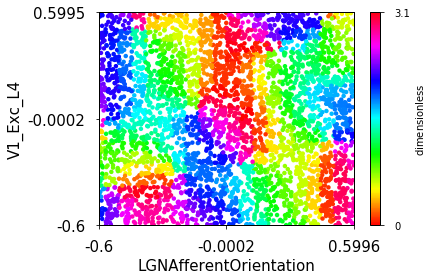

In [11]:
reload(mozaik.visualization.plotting)
dsv = param_filter_query(data_store,sheet_name=['V1_Exc_L4'],value_name='LGNAfferentOrientation')   
mozaik.visualization.plotting.PerNeuronValuePlot(dsv,ParameterSet({"cortical_view" : True}),plot_file_name='ORSet.png').plot()
            